In [1]:
!mkdir -p ~/.kaggle
!cp kaggle\ \(2\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [2]:
!kaggle datasets download -d sobhanmoosavi/us-accidents -p /content


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -o /content/us-accidents.zip -d /content


Archive:  /content/us-accidents.zip
  inflating: /content/US_Accidents_March23.csv  


In [4]:

!pip install dask[dataframe] --quiet
import dask.dataframe as dd
import matplotlib.pyplot as plt


In [5]:
ddf = dd.read_csv("/content/US_Accidents_March23.csv", usecols=["State", "Start_Time", "Severity", "Start_Lat", "Start_Lng"])
ddf.head()

,Severity,Start_Time,Start_Lat,Start_Lng,State
0,3,2016-02-08 05:46:00,39.865147,-84.058723,OH
1,2,2016-02-08 06:07:59,39.928059,-82.831184,OH
2,2,2016-02-08 06:49:27,39.063148,-84.032608,OH
3,3,2016-02-08 07:23:34,39.747753,-84.205582,OH
4,2,2016-02-08 07:39:07,39.627781,-84.188354,OH


from matplotlib import pyplot as plt
_df_0['Severity'].plot(kind='hist', bins=20, title='Severity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Start_Lat'].plot(kind='hist', bins=20, title='Start_Lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Start_Lng'].plot(kind='hist', bins=20, title='Start_Lng')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Severity', y='Start_Lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Start_Lat', y='Start_Lng', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start_Time']
  ys = series['Severity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Start_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start_Time')
_ = plt.ylabel('Severity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start_Time']
  ys = series['Start_Lat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Start_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start_Time')
_ = plt.ylabel('Start_Lat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start_Time']
  ys = series['Start_Lng']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Start_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start_Time')
_ = plt.ylabel('Start_Lng')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Start_Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Start_Time'}, axis=1)
              .sort_values('Start_Time', ascending=True))
  xs = counted['Start_Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Start_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start_Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Severity'].plot(kind='line', figsize=(8, 4), title='Severity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Start_Lat'].plot(kind='line', figsize=(8, 4), title='Start_Lat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Start_Lng'].plot(kind='line', figsize=(8, 4), title='Start_Lng')
plt.gca().spines[['top', 'right']].set_visible(False)

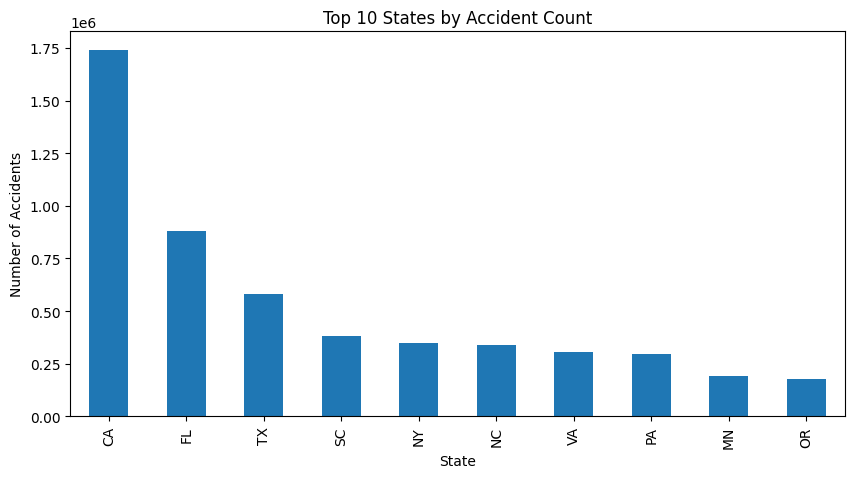

In [6]:
# top 10 states from all 7M rows
top_states = ddf["State"].value_counts().nlargest(10).compute()

# Plot
top_states.plot(kind="bar", figsize=(10,5), title="Top 10 States by Accident Count",
                ylabel="Number of Accidents", xlabel="State")
plt.show()


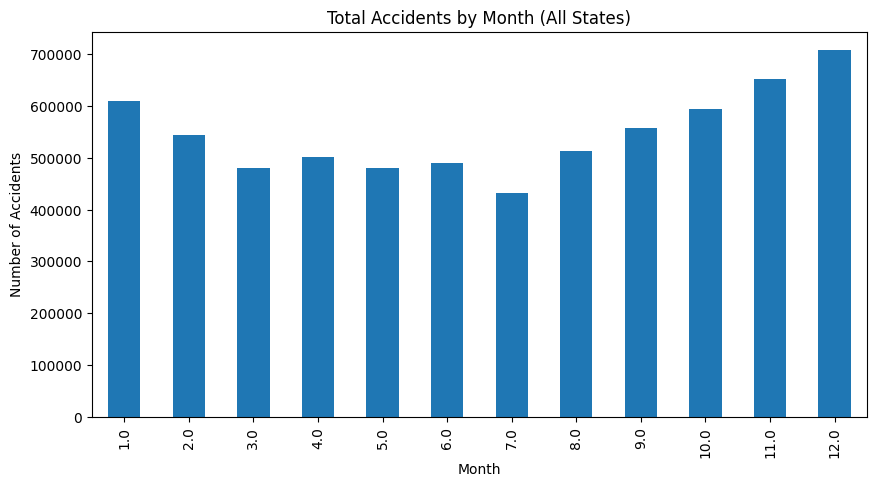

In [7]:
ddf["Start_Time"] = dd.to_datetime(ddf["Start_Time"], errors="coerce")

accidents_per_month = ddf["Start_Time"].dt.month.value_counts().compute().sort_index()

accidents_per_month.plot(kind="bar", figsize=(10,5),
                         title="Total Accidents by Month (All States)",
                         xlabel="Month", ylabel="Number of Accidents")
plt.show()


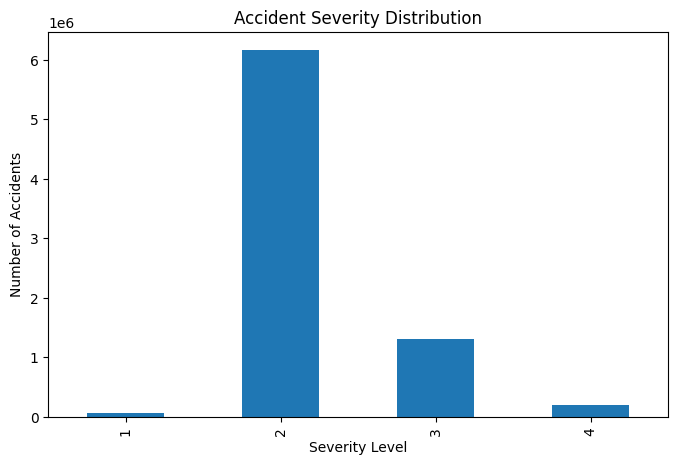

In [8]:
severity_counts = ddf["Severity"].value_counts().compute().sort_index()
severity_counts.plot(kind="bar", figsize=(8,5),
                     title="Accident Severity Distribution",
                     xlabel="Severity Level", ylabel="Number of Accidents")
plt.show()


In [9]:
sample = ddf.sample(frac=0.01).compute()
sample.to_csv("/content/accidents_sample.csv", index=False)
print("✅ Sample saved as accidents_sample.csv (≈1% of full data)")


✅ Sample saved as accidents_sample.csv (≈1% of full data)


In [10]:
!pip install numpy==1.26.4 --quiet
import numpy as np
if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = DeprecationWarning

!pip install sweetviz --quiet
import sweetviz as sv
import pandas as pd

sample = pd.read_csv("/content/accidents_sample.csv")

report = sv.analyze(sample)
report.show_html("EDA_Report.html")
print("✅ SweetViz report generated — open 'EDA_Report.html' in the Files panel to view.")


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ SweetViz report generated — open 'EDA_Report.html' in the Files panel to view.


In [11]:
!pip install sweetviz --quiet
import sweetviz as sv
import pandas as pd

# use the 1 % sample you saved earlier
sample = pd.read_csv("/content/accidents_sample.csv")

t EDA report
report = sv.analyze(sample)
report.show_html("EDA_Report.html")
print("✅  SweetViz report generated — open 'EDA_Report.html' in the left Files pane to view.")


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅  SweetViz report generated — open 'EDA_Report.html' in the left Files pane to view.


In [13]:
!pip install folium --quiet
import folium

m = folium.Map(location=[37.09, -95.71], zoom_start=4, tiles="CartoDB positron")

for _, r in sample.sample(2000, random_state=42).iterrows():
    folium.CircleMarker(
        location=[r["Start_Lat"], r["Start_Lng"]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("US_Accidents_Map.html")
print("✅  Map created — open 'US_Accidents_Map.html' in the Files pane to view.")


✅  Map created — open 'US_Accidents_Map.html' in the Files pane to view.


Planned Derived Features for Week 2:
• Weather-Adjusted Severity Index = Severity × (1 + precipitation/visibility factor)
• Traffic Density ≈ Accidents per 100 k Population or per mile of roadway
• Lagged Features = Previous 7-day and 30-day rolling accident counts per state